Data on graphs:
1. LD_psis_beta_children: For the full ensemble, find psi dihedral of children of states which have current psi in beta.
2. LD_psis_notbeta_children: For the full ensemble, find psi dihedral of children of states which do not have current psi in beta.
3. LD_prob_path_begin100it.png: Most probable path to T1 based on weights from iter:101-300
4. LD_psis_C1_never_transit.png: psis of states currently in C1, that have never been to anyother state once visited C1. Current state is calculated from iter:100 but history is tracked from 1.
5. LD_psis_T1_immediate_histC1.png: psis of states currently in T1, and were not in T1 one iteration ago. Current state is calculated from iter:100 but history is tracked from 21.
6. LD_histpsis_T1_immediate_histC1.png: Psis: Full history of states identified above. Here the current state is not counted as part of history.

# Full ensemble features

In [1]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from westpa.analysis import Run
import h5py
import pyemma
import seaborn as sns

In [2]:
run = 'run11'
west = Run.open('/home/akshay/bispidine2/bisleuLD/'+run+'/west.h5')

In [4]:
traj_list = []
for i in range(1,west.num_iterations+1):
    for j in west.iteration(i).num_walkers:
        traj_list.append('/traj_segs/'+str(i).zfill(6)+'/'+str(j).zfill(6)+'/seg.xtc')

200

In [12]:
traj_list = []
def get_coords(run):
    topology = 'common_files/lld_ini.pdb'
    west = Run.open('/home/akshay/bispidine2/bisleuLD/'+run+'/west.h5')
    for i in range(1,west.num_iterations+1):
        for j in range(west.iteration(i).num_walkers):
            traj_list.append('traj_segs/'+str(i).zfill(6)+'/'+str(j).zfill(6)+'/seg.xtc')
    featurizer = pyemma.coordinates.featurizer(topology)
    dihedral_indices = np.genfromtxt('../dihedral_indices.txt', skip_header=2).astype(int)
    di1 = 10
    di2 = 18
    featurizer.add_dihedrals(dihedral_indices)
    # Load data
    coord_data = pyemma.coordinates.load(traj_list,features=featurizer)
    coord_data = np.array([i[1,:] for i in coord_data])
    return coord_data

In [13]:
run11_data = get_coords('run11')

100%|██████████| 242893/242893 [04:13<00:00, 956.54it/s]                                 


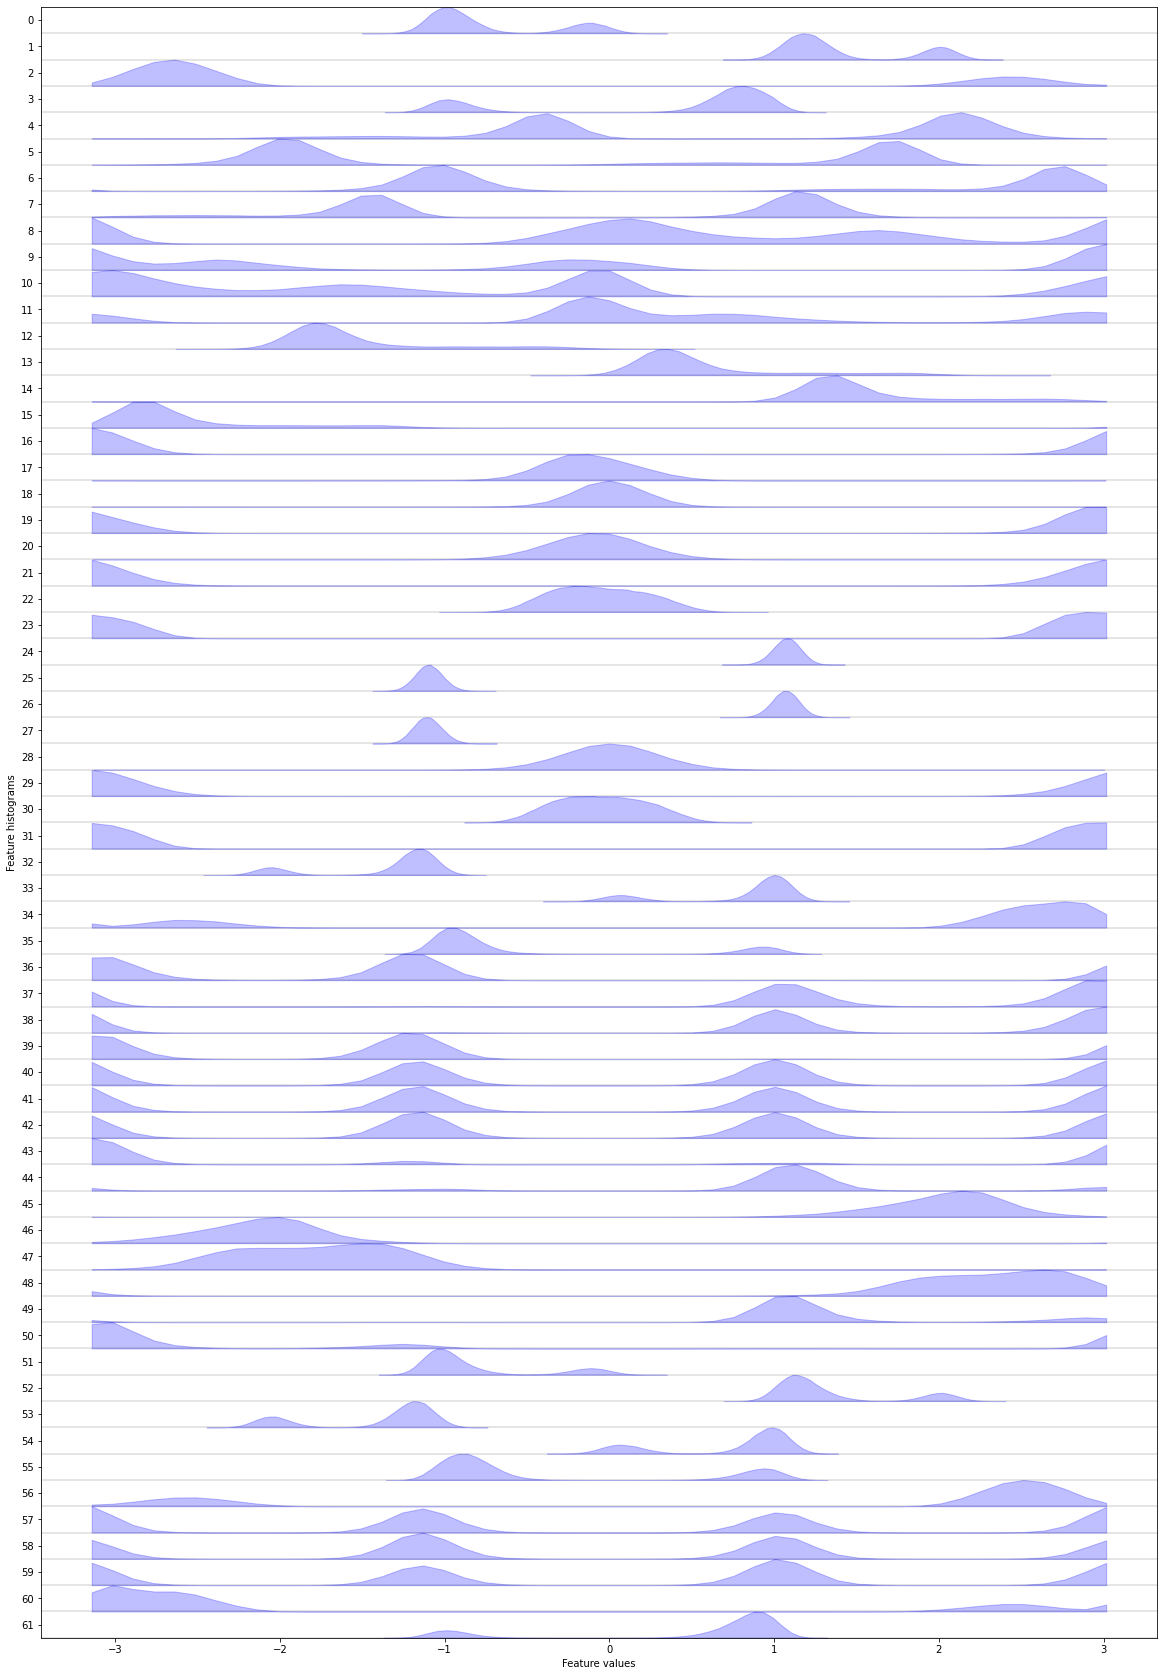

In [15]:
fig, ax = plt.subplots(figsize=(20, 30))
pyemma.plots.plot_feature_histograms(run11_data, ax=ax, ignore_dim_warning=True, color='b')
plt.savefig('run11_200it_allstates_difeatures.png', dpi=300)

# Compute significant feature differences

In [1]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from westpa.analysis import Run
import h5py
import pyemma
import seaborn as sns

In [25]:
def get_coords(run, bin_id):
    west = Run.open('/home/akshay/bispidine2/bisleuLD/'+run+'/west.h5')
    bins = [-inf, -130, -40, 50, 130, inf ]
    dim1 = [np.digitize(iteration.pcoords[:,1,0],bins, right=True) for iteration in west]
    dim1 = dim1[:40]
    states = [ np.where(iteration == bin_id) for iteration in dim1]
    # Define topology
    topology = 'common_files/lld_ini.pdb'
    traj_list = []
    for iteration, segments in enumerate(states):
        for s in segments[0]:
            traj_list.append('/home/akshay/bispidine2/bisleuLD/'+run+'/traj_segs/'+str(iteration+1).zfill(6)+'/'+str(s).zfill(6)+'/seg.xtc')
    # Specify features
    featurizer = pyemma.coordinates.featurizer(topology)
    dihedral_indices = np.genfromtxt('../dihedral_indices.txt', skip_header=2).astype(int)
    di1 = 10
    di2 = 18
    featurizer.add_dihedrals(dihedral_indices)
    # Load data
    coord_data = pyemma.coordinates.load(traj_list,features=featurizer)
    coord_data = np.array([i[1,:] for i in coord_data])
    return traj_list, coord_data

In [63]:
C1_run9_list, C1_run9_data = get_coords('run9',2)
int_run11_list, int_run11_data = get_coords('run11',3)
C1_run11_list, C1_run11_data = get_coords('run11',2)

100%|██████████| 22718/22718 [00:24<00:00, 925.30it/s]                                 


In [77]:
T1_run11_list, T1_run11_data = get_coords('run11',4)

100%|██████████| 14362/14362 [00:15<00:00, 940.75it/s]                                 


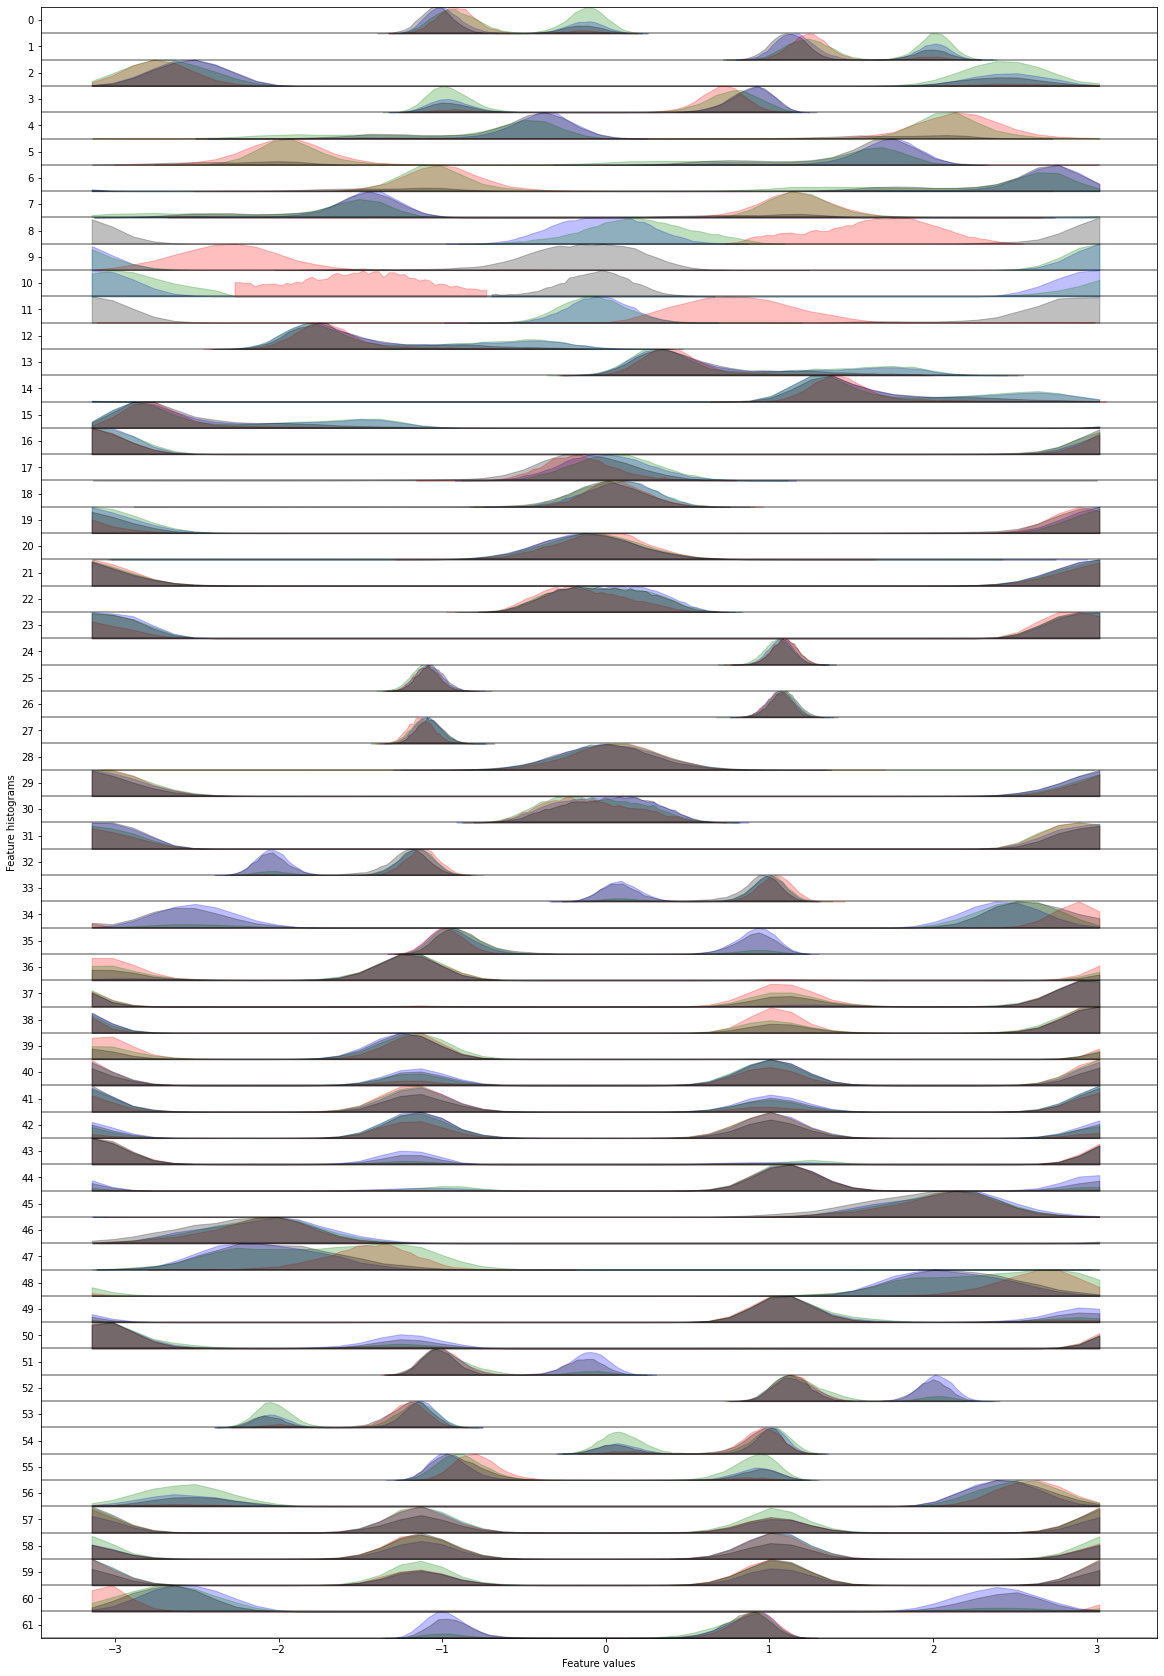

In [84]:
fig, ax = plt.subplots(figsize=(20, 30))
pyemma.plots.plot_feature_histograms(C1_run9_data, ax=ax, ignore_dim_warning=True, color='b')
pyemma.plots.plot_feature_histograms(int_run11_data, ax=ax, ignore_dim_warning=True, color='r' )
pyemma.plots.plot_feature_histograms(C1_run11_data, ax=ax, ignore_dim_warning=True, color='g' )
pyemma.plots.plot_feature_histograms(T1_run11_data, ax=ax, ignore_dim_warning=True, color='k' )
plt.savefig('run9_run11_2.png', dpi=300)

In [41]:
C1_run9_pca = pyemma.coordinates.pca(C1_run9_data, dim=4).get_output()
int_run11_pca = pyemma.coordinates.pca(int_run11_data, dim=4).get_output()

/home/akshay/apps/anaconda/anaconda3/envs/westpa-2022.02/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/akshay/apps/anaconda/anaconda3/envs/westpa-2022.02/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
/home/akshay/apps/anaconda/anaconda3/envs/westpa-2022.02/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/akshay/apps/anaconda/anaconda3/envs/westpa-2022.02/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


In [51]:
dihedral_indices = np.genfromtxt('../dihedral_indices.txt', skip_header=2).astype(int)
dihedral_indices[4:12]

array([[29,  1, 11, 23],
       [29,  1, 11,  7],
       [30,  1, 11, 23],
       [30,  1, 11,  7],
       [11,  1, 30, 18],
       [11,  1, 30,  6],
       [29,  1, 30, 18],
       [29,  1, 30,  6]])

In [52]:
dihedral_indices[37:40]

array([[11,  7, 17, 21],
       [17,  7, 11,  1],
       [17,  7, 11, 23]])

In [53]:
dihedral_indices[47:49]

array([[ 1, 11, 23,  3],
       [ 7, 11, 23,  3]])

In [54]:
dihedral_indices[18]

array([28,  2, 22,  0])

In [68]:
dihedral_indices[32:36]

array([[30,  6,  9,  0],
       [30,  6,  9,  4],
       [ 9,  6, 30,  1],
       [ 9,  6, 30, 18]])

In [71]:
dihedral_indices[51:56]

array([[ 4, 14, 18, 30],
       [15, 14, 18, 30],
       [18, 14, 15, 22],
       [ 4, 14, 15, 22],
       [14, 15, 22,  0]])

In [70]:
dihedral_indices[60:62]

array([[14, 18, 30,  1],
       [14, 18, 30,  6]])

# Find T1 states with history in C1

In [ ]:
import numpy as np
from numpy import inf
import pyemma
from westpa.analysis import Run
import matplotlib.pyplot as plt

In [3]:
run = 'run11'
bin_id = 4
west = Run.open('/home/akshay/bispidine2/bisleuLD/'+run+'/west.h5')
bins = [-inf, -130, -40, 50, 130, inf ]
dim1 = [np.digitize(iteration.pcoords[:,1,0],bins, right=True) for iteration in west]
states = [ np.where(iteration == bin_id) for iteration in dim1]

In [23]:
l = []
for i,iteration in enumerate(states):
    for walker in iteration[0]:
        w = west.iteration(i+1).walker(walker).trace()
        w_iters = np.arange(1,i+2)
        w_walkers = [segment.index for segment in w]   
        w_hist = np.array([dim1[a-1][b] for a,b in zip(w_iters,w_walkers)])        
        if 2 in w_hist:
            l.append(str(i+1).zfill(6)+'/'+str(walker).zfill(6)+'/seg.xtc')

In [46]:
def get_coords(run, ensemble):
    #ensemble = np.load(run+'/'+ensemble+'.npy')[:5000]
    topology = 'common_files/lld_ini.pdb'
    
    ensemble = ensemble[:5000]
    
    ensemble = [ 'traj_segs/'+i  for i in list(ensemble)]
    
    featurizer = pyemma.coordinates.featurizer(topology)
    dihedral_indices = np.genfromtxt('../dihedral_indices.txt', skip_header=2).astype(int)
    di1 = 10
    di2 = 18
    featurizer.add_dihedrals(dihedral_indices)
    coord_data = pyemma.coordinates.load(ensemble,features=featurizer)
    return coord_data

In [48]:
x = get_coords('run10',ls)

100%|██████████| 5000/5000 [00:05<00:00, 889.72it/s]                                 


In [82]:
x = np.concatenate(x)

In [84]:
dihedral_indices = np.genfromtxt('../dihedral_indices.txt', skip_header=2).astype(int)
di1 = 10
di2 = 18

In [98]:
pc_data = np.stack([x[:,di1],x[:,di2]], axis =1) #progress coordinate data

In [93]:
pc_data = np.rad2deg(pc_data)

(-3.14, 3.14)

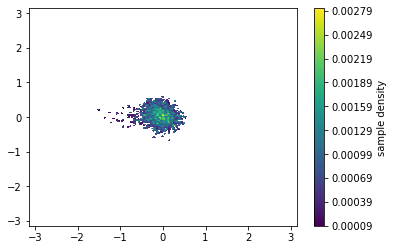

In [99]:
pyemma.plots.plot_density(*pc_data.T)
plt.xlim([-3.14, 3.14])
plt.ylim([-3.14, 3.14])

In [49]:
y = np.concatenate(np.rad2deg(x))

(<Figure size 1440x2160 with 1 Axes>,
 <AxesSubplot:xlabel='Feature values', ylabel='Feature histograms'>)

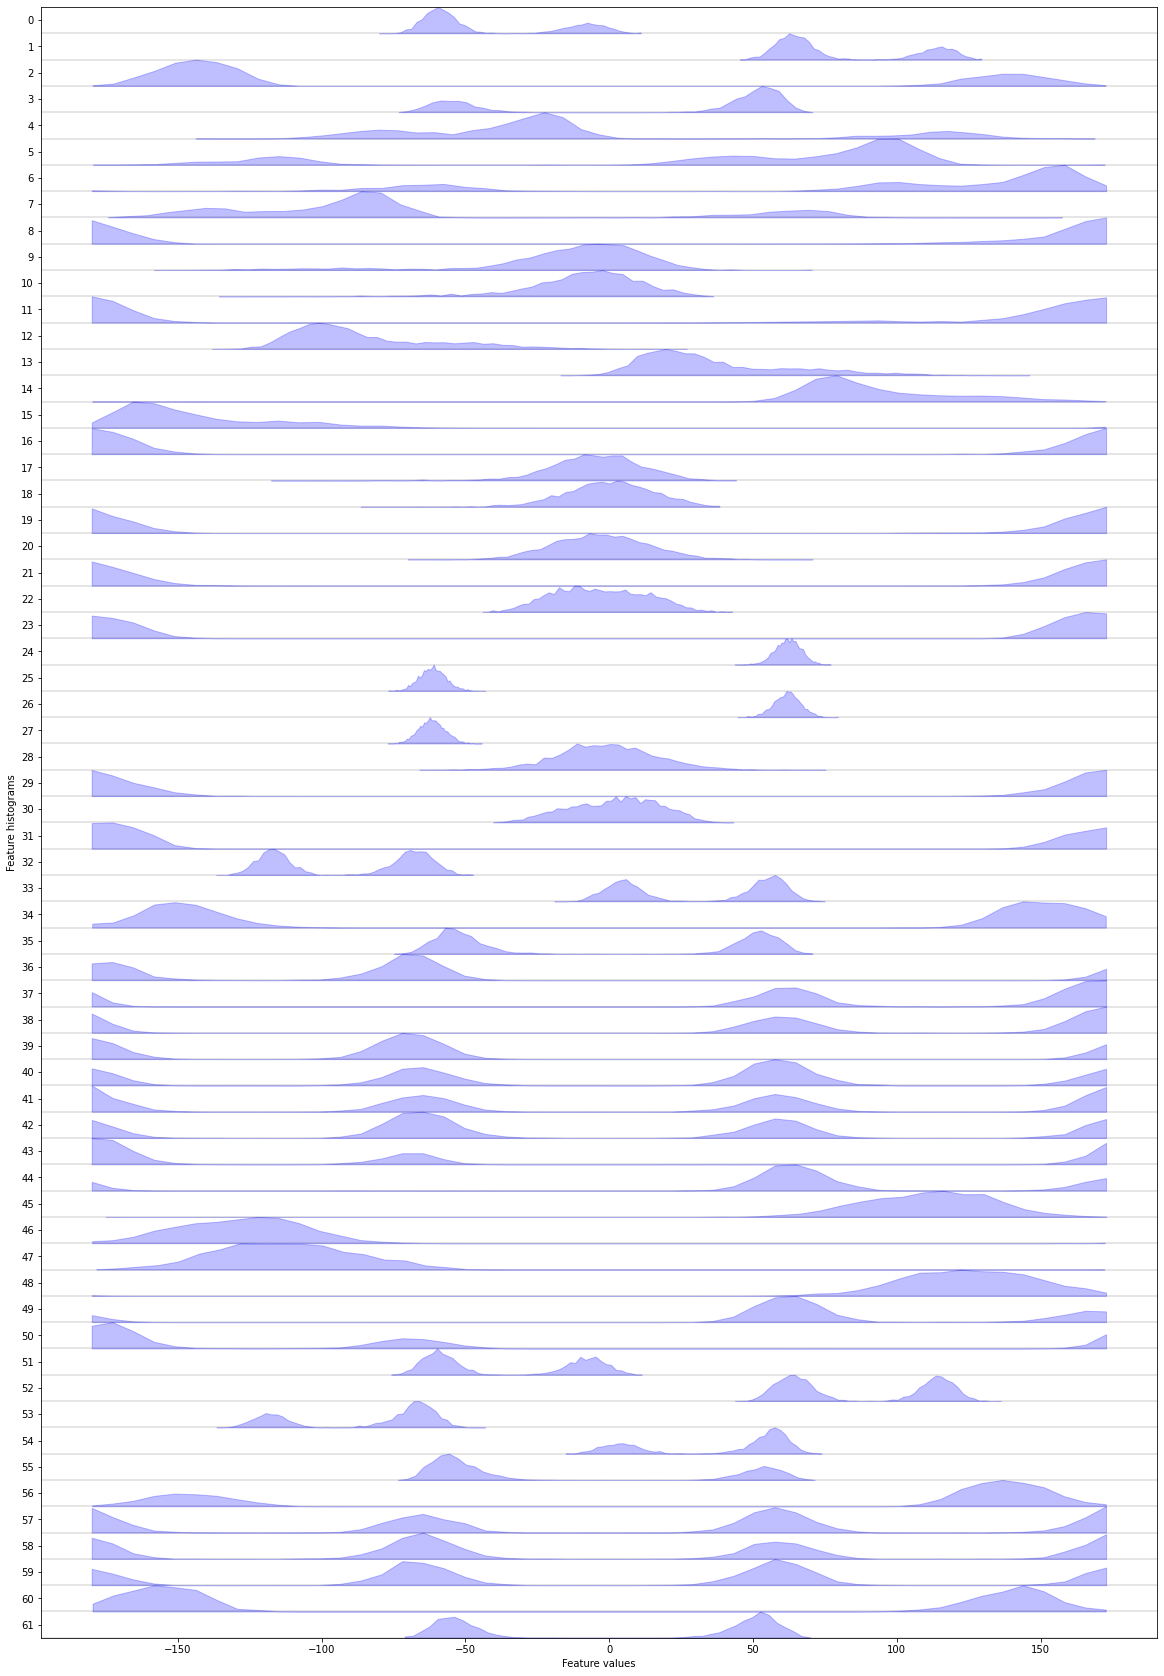

In [50]:
fig, ax = plt.subplots(figsize=(20,30))
pyemma.plots.plot_feature_histograms(y, ax=ax, ignore_dim_warning=True, color='b')

# V2: Find T1 states with history in C1

In [1]:
import numpy as np
from westpa.analysis import Run
import h5py

* bin definitions
- ['-inf', -130.0, -40.0, 50.0, 130.0, 'inf']
- ['-inf', 60.0, 130.0, 'inf']

In [2]:
f = h5py.File('ANALYSIS/C1_T1_2it/assign.h5','r')
run11 = Run.open('west.h5')
c = np.array(f['statelabels']) #current
h = np.array(f['trajlabels']) #history
hist_T1 = np.where(c == 1)
hist_T1 = np.unique(np.vstack(hist_T1)[:2,:].T, axis=0)

* 0 is C1
* 1 is T1
* 2 is int, others

In [3]:
T1_hist_labels = []
frame = []
for iteration,segment in zip(hist_T1[:,0],hist_T1[:,1]):
    t = run11.iteration(iteration+1).walker(segment).trace()
    t_iter = np.arange(1,iteration+2)
    t_walker = np.array([walker.index for walker in t])
    t_hist = h[t_iter-1, t_walker].flatten()
    if 0 in t_hist:
        T1_hist_labels.append(str(iteration+1).zfill(6)+'/'+str(segment).zfill(6)+'/seg.xtc')
        if t_hist[-1] != 1:
            frame.append(0)
        else:
            frame.append(1)
frame = np.array(frame)

In [11]:
np.save('T1_hist_C1', T1_hist_labels) # Segments in T1 with history in C1

In [14]:
t.initial_state.pcoord

array([23.023, 70.015], dtype=float32)

In [15]:
t_hist

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

# States which can transit and which do not
## Check hist_states.py for implementation

In [ ]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from westpa.analysis import Run
import h5py
import pyemma
import seaborn as sns

In [ ]:
west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
trajlabels = np.array(f['trajlabels'])[:,:,1] # Recent history
statelabels = np.array(f['statelabels'])[:,:,1] # Current states

In [ ]:
yes_transit = []
no_transit = []
for iters in list(west)[100:]: #starts at 1
    num_iter = iters.number 
    num_iter_range = np.arange(num_iter)
    for walker in iters:
        w = walker.index
        trace = walker.trace()
        trace_segs = [segs.index for segs in trace]
        current_statelabel = statelabels[num_iter-1,w]
        hist_trajlabel = trajlabels[num_iter_range,trace_segs]
        if (current_statelabel==2) or (current_statelabel==0 and (1 in hist_trajlabel)) or (current_statelabel==1 and (0 in hist_trajlabel)):
            yes_transit.append('traj_segs/'+str(num_iter).zfill(6) +'/' + str(w).zfill(6)+'/seg.xtc')
        else:
            no_transit.append('traj_segs/'+str(num_iter).zfill(6) +'/' + str(w).zfill(6)+'/seg.xtc')

<StemContainer object of 3 artists>

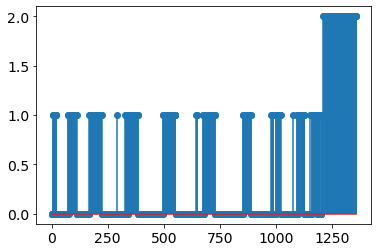

In [16]:
plt.stem(traj_labels[-1,:,1])

# Find states with actual transition

In [1]:
import numpy as np
from westpa.analysis import Run
import h5py

In [2]:
west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
trajlabels = np.array(f['trajlabels'])[:,:,1] # Recent history
statelabels = np.array(f['statelabels'])[:,:,1] # Current states

In [3]:
yes_transit = np.load('yes_transit.npy')

In [4]:
actual_transit = []
for vals in yes_transit:
    iter_num = int(vals[10:16].lstrip('0'))
    if vals[17:23].lstrip('0') == '':
        walker_num = 0
    else:
        walker_num = int(vals[17:23].lstrip('0'))
    if statelabels[iter_num-1,walker_num] != 2:
        actual_transit.append('traj_segs/'+str(iter_num).zfill(6) +'/' + str(walker_num).zfill(6)+'/seg.xtc')

In [6]:
np.save('actual_transit.npy',actual_transit)

# IMP: Finding lowest energy path

In [50]:
import numpy as np
from westpa.analysis import Run
import h5py
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r') # See the corresponding line in west.h5 for bin definition
labelled_population = np.array(f['labeled_populations'])
C1_labelled_population = np.array(f['labeled_populations'])[100:,0,:]

(0.0, 1.0)

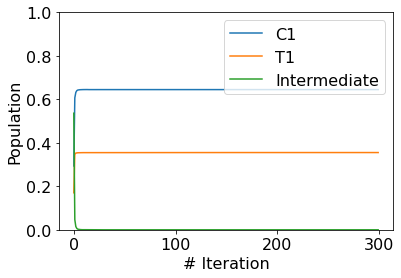

In [52]:
plt.figure(figsize=(6,4))
plt.plot(labelled_population[:,0,:].sum(axis=1)) # In C1
plt.plot(labelled_population[:,1,:].sum(axis=1)) # In T1
plt.plot(labelled_population[:,2,:].sum(axis=1)) # In intermediate
plt.xlabel('# Iteration')
plt.ylabel('Population')
plt.legend(['C1','T1','Intermediate'], loc='upper right')
plt.ylim([0, 1])

In [53]:
tot_C1_lab_pop = C1_labelled_population.sum(axis=0)

In [54]:
weight_matrix = tot_C1_lab_pop[:-1].reshape(21,12)

In [55]:
for i in range(len(weight_matrix)):
    weight_matrix[i] = weight_matrix[i]/max(weight_matrix[i])
weight_matrix[-2:,:] = 0
max_prob_path = weight_matrix.argmax(axis=1)[:-2]

/tmp/ipykernel_26853/3398119144.py:2: RuntimeWarning: invalid value encountered in divide
  weight_matrix[i] = weight_matrix[i]/max(weight_matrix[i])


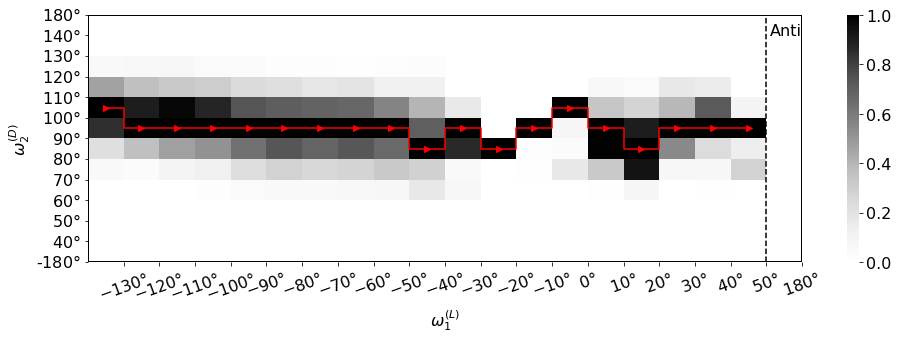

In [64]:
xlabel = ['$'+str(int(i))+ '\degree$' for i in np.linspace(-130,50,19)]
xlabel.append(r'180$\degree$')
#xlabel.insert(0,'-180')
#xlabel.append('180')

ylabel = ['$'+str(int(i))+ '\degree$' for i in np.linspace(40,140,11)]
ylabel.append(r'180$\degree$')
ylabel.insert(0,r'-180$\degree$')

plt.figure(figsize=(14,5))
plt.rcParams['font.size'] = 16

ax = sns.heatmap(np.flipud(weight_matrix.T), cmap=sns.color_palette("Greys", as_cmap=True), cbar=True)
#for i in range(weight_matrix.shape[1]+1):
#    ax.axhline(i, color='white', lw=15)
#for i in range(weight_matrix.shape[0]+1):
#    ax.axvline(i, color='white', lw=1)
plt.xticks(np.arange(1,21), xlabel,rotation=20)
plt.yticks(np.arange(0,13),np.flip(ylabel),rotation=0)
plt.xlim([0,20])
plt.xlabel(r'$\omega_1^{(L)}$')
plt.ylabel(r'$\omega_2^{(D)}$')
plt.tight_layout()
#plt.title(r' L,D Leucine bispidine @ 328K: Paths from C1 $\to$ T1')

ax.axhline(y=0, color='k',linewidth=2)
ax.axhline(y=weight_matrix.shape[1], color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=2)
ax.axvline(x=weight_matrix.shape[0]-1, color='k',linewidth=2)
ax.axvline(x=weight_matrix.shape[0]-2, color='k',linestyle='dashed')
plt.text(19.1,1,'Anti', size='16')

plt.step(np.arange(0.5,19.5),11.5-max_prob_path, where='mid', color='r', marker='>')

plt.savefig('ld_prob_path_begin100it',dpi=300, bbox_inches='tight', facecolor='w')

Text(0.5, 1.0, 'Most Probable path C1 $\\to$ T1')

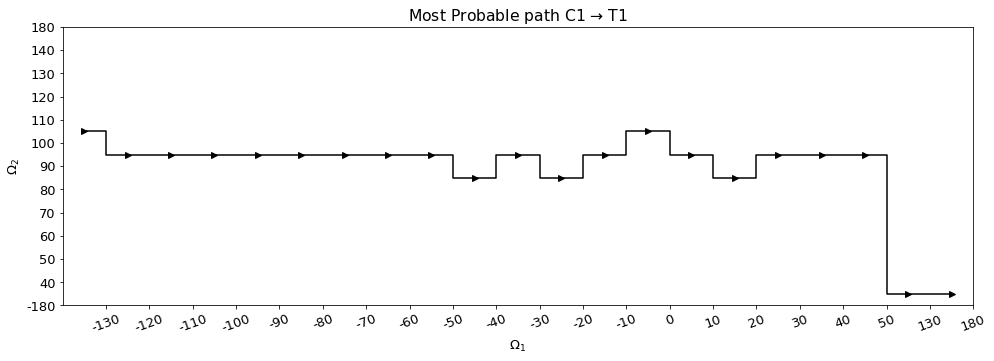

In [29]:
xlabel = [str(int(i)) for i in np.linspace(-130,50,19)]
xlabel.append('130')
#xlabel.insert(0,'-180')
xlabel.append('180')

ylabel = [str(int(i)) for i in np.linspace(40,140,11)]
ylabel.append('180')
ylabel.insert(0,'-180')

plt.figure(figsize=(14,5))
plt.rcParams['font.size'] = 13
plt.step(np.arange(0.5,21.5),args+.5, where='mid', color='k', marker='>')
plt.xticks(np.arange(1,22), xlabel,rotation=20)
plt.yticks(np.arange(0,13),ylabel)
plt.xlim([0,21])
plt.xlabel(r'$\Omega_1$')
plt.ylabel(r'$\Omega_2$')
plt.tight_layout()
plt.title(r'Most Probable path C1 $\to$ T1')

# IMP: Cis to trans immediate transition
## See parallel_transit_hist.py for implementation

In [1]:
import numpy as np
from westpa.analysis import Run
import h5py
from joblib import Parallel, delayed
import threading

west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
statelabels = np.array(f['statelabels'])[:,:,1] # Current states

In [2]:
iters = np.where(statelabels == 1)[0] + 1
walkers= np.where(statelabels == 1)[1] 

In [3]:
def if_just_hist(iter_num,walker_num,start_iter, hist_label): # iter_num from 1, walker_num from 0
    if iter_num >=start_iter:
        trace = west.iteration(iter_num).walker(walker_num).trace()
        trace_walker_num = [seg.index for seg in trace]
        trace_states = statelabels[np.arange(iter_num),trace_walker_num]
        if (trace_states[-2] != trace_states[-1]) and (hist_label in trace_states[20:]): # if just entered and visited C1
            return 'traj_segs/'+str(iter_num).zfill(6) +'/' + str(walker_num).zfill(6)+'/seg.xtc'

In [ ]:
vals = []
for i,j in zip(iters,walkers):
    vals.append(if_just_hist(i,j,101,0))

In [54]:
vals = Parallel(n_jobs=-1, backend="multiprocessing")(delayed(if_just_hist)(i,j,101,0) for i,j in zip(iters,walkers))
np.save('T1_immediate_histC1.npy', vals)

CPU times: user 3.97 s, sys: 831 ms, total: 4.8 s
Wall time: 1min 11s


# IMP: Find states which once entering C1/T1 do not visit any other state: (see parallel_notransit_hist.py for implementation)

# IMP: Find the psi dihedral of transitioning states vs non-transitioning

In [35]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from westpa.analysis import Run
import h5py
import pyemma
import seaborn as sns

In [36]:
def get_coords_fromassign(run, file_list):
    west = Run.open('/home/akshay/bispidine2/bisleuLD/'+run+'/west.h5')
    files = np.load(file_list)
    # Define topology
    topology = 'common_files/lld_ini.pdb'
    traj_list = []
    for f in files:
        traj_list.append('/home/akshay/bispidine2/bisleuLD/'+run+'/'+f)
    # Specify features
    featurizer = pyemma.coordinates.featurizer(topology)
    dihedral_indices = np.genfromtxt('../dihedral_indices.txt', skip_header=2).astype(int)
    di1 = 10
    di2 = 18
    psi = 6
    featurizer.add_dihedrals(dihedral_indices)
    # Load data
    coord_data = pyemma.coordinates.load(traj_list,features=featurizer)
    coord_data = np.array([i[1,:] for i in coord_data])
    #return coord_data[:,psi].reshape(-1,1)
    return coord_data[:,psi]

In [37]:
#coord_data = get_coords_fromassign('run11','T1_immediate_histC1.npy')
coord_data = get_coords_fromassign('run11','C1_never_transit.npy')

100%|██████████| 21127/21127 [00:22<00:00, 944.04it/s]                                 


In [40]:
np.save('psi-C1_never_transit.npy', coord_data)

# IMP: Per iteration psis, see psi_iters.py for implementation (or LL/run19/ipynb)

# IMP: Check psis of children if parent is in beta

In [2]:
import numpy as np
from westpa.analysis import Run
import pickle
import matplotlib.pyplot as plt
import h5py

west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
statelabels = np.array(f['statelabels'])[:,:,1] # Current states

with open('psi_iters.pkl','rb') as f:
    psi_iters = pickle.load(f)

In [4]:
psis_children = []
child_states = []

for i in range(west.num_iterations):
    iters = i+1
    betas = np.where(psi_iters[i] >= np.deg2rad(90))[0]
    for w in betas:
        child = list(west.iteration(iters).walker(w).children)
        if child:
            child_walker_num =  [c.index for c in child]
            psis_children.append(psi_iters[i+1][child_walker_num])
            child_states.append(statelabels[i,child_walker_num])
psis_beta_children = np.concatenate(np.array(psis_children)).flatten()
states_beta_children = np.concatenate(np.array(child_states)).flatten()

/tmp/ipykernel_28177/1051278396.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  psis_beta_children = np.concatenate(np.array(psis_children)).flatten()
/tmp/ipykernel_28177/1051278396.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  states_beta_children = np.concatenate(np.array(child_states)).flatten()


In [8]:
np.save('psis_beta_children.npy',psis_beta_children)
np.save('states_beta_children.npy',states_beta_children)

## Plot psi distribution of children trajectories

In [3]:
import seaborn as sns

Text(0.5, 0, '$\\psi_1^{(L)}$')

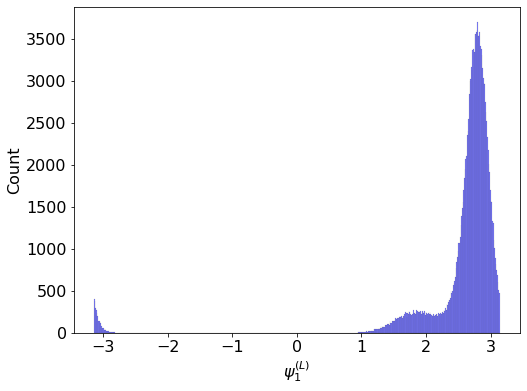

In [9]:
psis_beta_children = np.load('psis_beta_children.npy')
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
'''
zeros = np.where(states_beta_children == 0)[0]
sns.histplot(psis_beta_children[zeros], kde=False, alpha=0.5)

ones = np.where(states_beta_children == 1)[0]
sns.histplot(psis_beta_children[ones], kde=False, alpha=0.5)

twos = np.where(states_beta_children == 2)[0]
sns.histplot(psis_beta_children[twos], kde=False, alpha=0.5)
'''
sns.histplot(psis_beta_children, kde=False, color='b', alpha=0.5)
plt.xlabel(r'$\psi_1^{(L)}$')
#plt.title(r'Children of parents with $\Psi \in \beta$ (iter:1-300)')
#plt.savefig('LD_psis_beta_children.png',dpi=300,bbox_inches="tight")

# IMP: Psis of children if parents are not in beta

In [1]:
import numpy as np
from westpa.analysis import Run
import pickle
import matplotlib.pyplot as plt
import h5py

west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
statelabels = np.array(f['statelabels'])[:,:,1] # Current states

with open('psi_iters.pkl','rb') as f:
    psi_iters = pickle.load(f)

In [2]:
psis_children = []
child_states = []

for i in range(west.num_iterations):
    iters = i+1
    betas = np.where(psi_iters[i] < np.deg2rad(90))[0]
    for w in betas:
        child = list(west.iteration(iters).walker(w).children)
        if child:
            child_walker_num =  [c.index for c in child]
            psis_children.append(psi_iters[i+1][child_walker_num])
            child_states.append(statelabels[i,child_walker_num])
psis_notbeta_children = np.concatenate(np.array(psis_children)).flatten()
states_notbeta_children = np.concatenate(np.array(child_states)).flatten()

/tmp/ipykernel_21717/3304482975.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  psis_notbeta_children = np.concatenate(np.array(psis_children)).flatten()
/tmp/ipykernel_21717/3304482975.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  states_notbeta_children = np.concatenate(np.array(child_states)).flatten()


In [3]:
np.save('psis_notbeta_children.npy',psis_notbeta_children)
np.save('states_notbeta_children.npy',states_notbeta_children)

## Plot psis of children trajectory

In [24]:
import seaborn as sns
psis_notbeta_children = np.load('psis_notbeta_children.npy')

/tmp/ipykernel_32304/1128039812.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchex" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('ld_psis_notbeta_children.png',dpi=300,bbox_inchex="tight", facecolor='w')


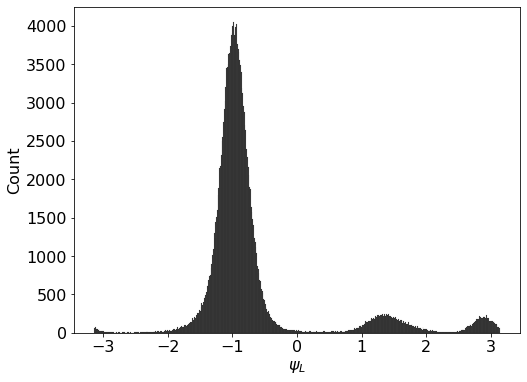

In [30]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
'''
zeros = np.where(states_notbeta_children == 0)[0]
sns.histplot(psis_notbeta_children[zeros], kde=False, alpha=0.5)

ones = np.where(states_notbeta_children == 1)[0]
sns.histplot(psis_notbeta_children[ones], kde=False, alpha=0.5)

twos = np.where(states_notbeta_children == 2)[0]
sns.histplot(psis_notbeta_children[twos], kde=False, alpha=0.5)
'''
sns.histplot(psis_notbeta_children, kde=False, color='k')
plt.xlabel(r'$\psi_L$')
#plt.title(r'Children of parents with $\Psi \notin \beta$ (iter:1-300)')
plt.savefig('ld_psis_notbeta_children.png',dpi=300,bbox_inchex="tight", facecolor='w')

# IMP: Plot the above two together, for publication

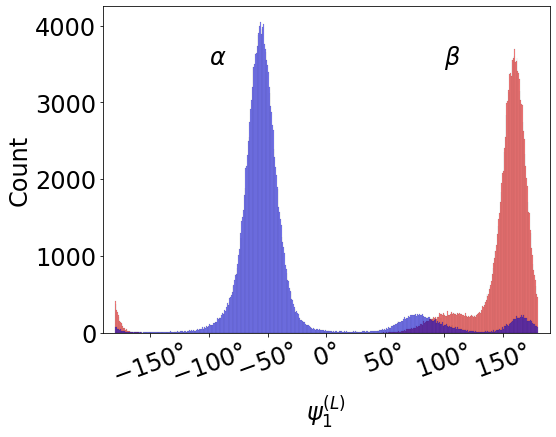

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

psis_beta_children = np.load('psis_beta_children.npy')
psis_notbeta_children = np.load('psis_notbeta_children.npy')

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '24'
plt.text(-100,3500,r'$\alpha$')
plt.text(100,3500,r'$\beta$')

sns.histplot(np.rad2deg(psis_beta_children), kde=False, color='r', alpha=0.5)
sns.histplot(np.rad2deg(psis_notbeta_children), kde=False, color='b', alpha=0.5)
plt.xlabel(r'$\psi_1^{(L)}$')
labels = ['-150','-100','-50','0','50', '100','150']
pos = [int(i) for i in labels]
labels = ['$'+str(int(i))+ '\degree$' for i in labels]
plt.xticks(pos,labels,rotation=20)
plt.xlim([-190, 190])
plt.savefig('ld_run11_psis_children.png',dpi=300,bbox_inches="tight", facecolor='w')

# IMP: Plot of psi of no transit and transit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_12305/479652181.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchex" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('LD_psis_T1_immediate_histC1.png',dpi=300,bbox_inchex="tight")


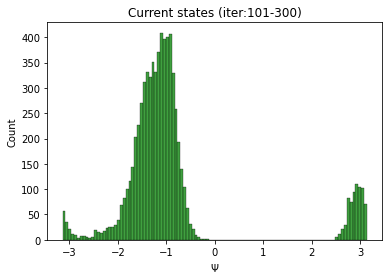

In [43]:
psi_T1_immediate_histC1 = np.load('psi-T1_immediate_histC1.npy')  #Current psi of states that just entered T1
plt.figure(figsize=(6,4))
sns.histplot(psi_T1_immediate_histC1, kde=False, color='green')
plt.xlabel(r'$\Psi$')
plt.title(r'Current states (iter:101-300)')#
plt.savefig('LD_psis_T1_immediate_histC1.png',dpi=300,bbox_inchex="tight")

/tmp/ipykernel_12305/1633986478.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchex" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('LD_psis_C1_never_transit.png',dpi=300,bbox_inchex="tight")


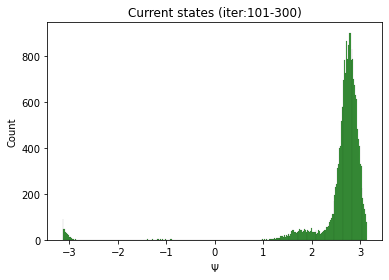

In [45]:
psi_C1_never_transit = np.load('psi-C1_never_transit.npy')
plt.figure(figsize=(6,4))
sns.histplot(psi_C1_never_transit, kde=False, color='green')
plt.xlabel(r'$\Psi$')
plt.title(r'Current states (iter:101-300)')# Never transited in the past
plt.savefig('LD_psis_C1_never_transit.png',dpi=300,bbox_inchex="tight")

## Analysis of psi_T1_immediate_histC1 > 1.57

In [1]:
import numpy as np
from westpa.analysis import Run
import h5py
import pickle
import matplotlib.pyplot as plt
import time

west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
trajlabels = np.array(f['trajlabels'])[:,:,1] # Recent history
statelabels = np.array(f['statelabels'])[:,:,1] # Current states
with open('psi_iters.pkl', 'rb') as f:
    psi_iters = pickle.load(f)

In [2]:
T1_immediate_histC1 = np.load('T1_immediate_histC1.npy')
psi_T1_immediate_histC1 = np.load('psi-T1_immediate_histC1.npy')

Find states currently in beta

In [3]:
beta_transit = T1_immediate_histC1[np.where(psi_T1_immediate_histC1 > np.deg2rad(90))[0]]

In [4]:
def find_psi_history(state_names):
    psi_history = []
    for vals in state_names:
        iter_num = int(vals[10:16].lstrip('0'))
        iter_num_range = np.arange(iter_num)
        if vals[17:23].lstrip('0') == '':
            walker_num = 0
        else:
            walker_num = int(vals[17:23].lstrip('0'))
        trace = west.iteration(iter_num).walker(walker_num).trace()
        walker_hist_num = [t.index for t in trace]
        psis = []
        for i,j in zip(iter_num_range, walker_hist_num):
            psis.append(psi_iters[i][j])
        psi_history.append(psis)
    return psi_history

In [5]:
psi_hist = find_psi_history(beta_transit)

Psis of history (includes current state)

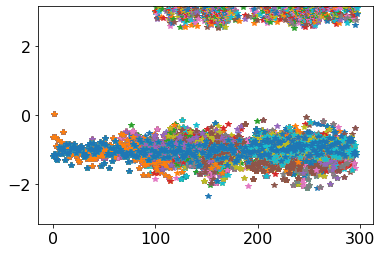

In [13]:
plt.ylim([-3.15, 3.15])
for i in psi_hist:
    plt.plot(np.concatenate(i),'*')

Psis of history (does includes current state)

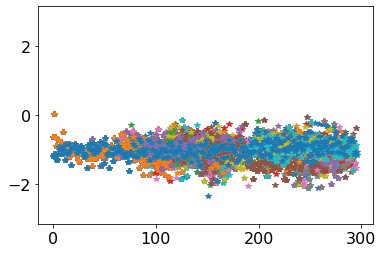

In [14]:
plt.ylim([-3.15, 3.15])
for i in psi_hist:
    plt.plot(np.concatenate(i)[:-1],'*')

How many current beta states have history in beta ?

In [15]:
multi_betas = []
for i,j in enumerate(psi_hist):
    num_beta = np.where(np.concatenate(j) > np.deg2rad(90))[0].shape[0]
    if num_beta > 1:
        multi_betas.append(i)
print('Number of states with history in beta =',len(multi_betas))

Number of states with history in beta = 0


Histogram of psi history (not including the current state)
#### Used in publication

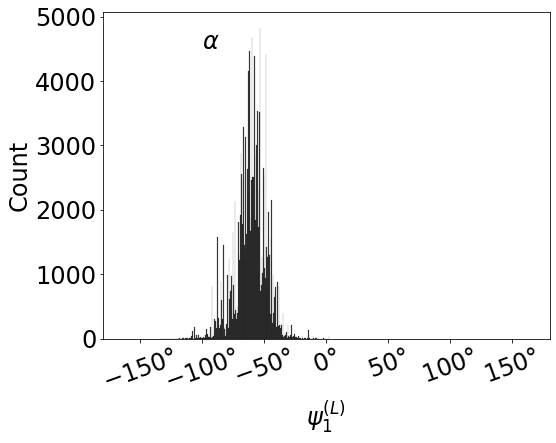

In [6]:
import seaborn as sns
psi_hist_nocurrent = [i[:-1] for i in psi_hist] # Does not include the current frame (ie frame that in T1 and beta psi)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '24'
sns.histplot(np.rad2deg(np.concatenate(psi_hist_nocurrent)).flatten(), kde=False, color='k')
plt.text(-100,4500,r'$\alpha$')
plt.xlabel(r'$\psi_1^{(L)}$')
labels = ['-150','-100','-50','0','50', '100','150']
pos = [int(i) for i in labels]
labels = ['$'+str(int(i))+ '\degree$' for i in labels]
plt.xticks(pos,labels,rotation=20)
plt.xlim([-180, 180])
#plt.text(-258,2070,'Count',rotation=90)
#plt.title(r'History (iter:1 onwards) of $\beta$-T1 states (iter:101-300)')
plt.savefig('ld_histpsis_T1_immediate_histC1.png',dpi=300,bbox_inches="tight",facecolor='w')

## Analysis of history of states in C1 that never visited any other state (except "int" initially)

In [66]:
import numpy as np
from westpa.analysis import Run
import h5py
import pickle
import matplotlib.pyplot as plt
import time

west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
trajlabels = np.array(f['trajlabels'])[:,:,1] # Recent history
statelabels = np.array(f['statelabels'])[:,:,1] # Current states
with open('psi_iters.pkl', 'rb') as f:
    psi_iters = pickle.load(f)

psi_C1_never_transit = np.load('psi-C1_never_transit.npy')
C1_never_transit = np.load('C1_never_transit.npy')

In [ ]:
psi_hist = find_psi_history(C1_never_transit)

# IMP: Plot of fes_300 iter, used in publication

/tmp/ipykernel_16777/690107224.py:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(-np.log(histogram[299].T), cmap='inferno', vmax=100)


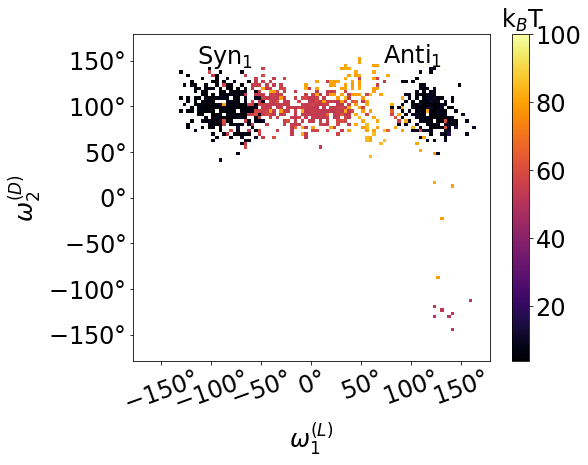

In [4]:
import numpy as np
#from westpa.analysis import Run
import h5py
#import pickle
import matplotlib.pyplot as plt
#import time
#import seaborn as sns
#from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap

f = h5py.File('pdist.h5')
histogram = np.array(f['histograms'])

'''
custom_map = cm.get_cmap('jet')
newcolors = custom_map(np.linspace(0,1,8))
#newcolors[0,:]=[1, 1, 1, 1]
new_cmp = ListedColormap(newcolors)
'''
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '24'
plt.pcolormesh(-np.log(histogram[299].T), cmap='inferno', vmax=100)
plt.colorbar()
plt.text(103,102,r'k$_B$T')
plt.text(18,91,r'Syn$_1$')
plt.text(70,91,r'Anti$_1$')
pos = [8,22,36,50,64,78,92]
labels = ['-150','-100','-50','0','50', '100','150']
labels = ['$'+str(int(i))+ '\degree$' for i in labels]
plt.xticks(pos,labels, rotation=20)
plt.yticks(pos,labels)
plt.xlabel(r'$\omega_1^{(L)}$')
plt.ylabel(r'$\omega_2^{(D)}$')
plt.savefig('ld_run11_CIT1fes_300iter.jpg', dpi=300, bbox_inches='tight', facecolor='w')

# IMP:Rate from iter-100, C1 to T1 transition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
f = h5py.File('ANALYSIS/C1_T1_100it/C1_T1_100it.h5')

/tmp/ipykernel_7329/1503600625.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File('ANALYSIS/C1_T1_100it/C1_T1_100it.h5')


In [3]:
f.keys()

<KeysViewHDF5 ['arrivals', 'avg_color_probs', 'avg_conditional_fluxes', 'avg_rates', 'avg_state_probs', 'avg_total_fluxes', 'color_prob_evolution', 'conditional_arrivals', 'conditional_flux_evolution', 'conditional_fluxes', 'duration_count', 'durations', 'rate_evolution', 'state_labels', 'state_pop_evolution', 'target_flux_evolution', 'total_fluxes']>

In [4]:
tau = 10e-12

In [5]:
rate_evol = np.array(f['rate_evolution']['expected'][:,0,1]) / tau
rate_evol_ub = np.array(f['rate_evolution']['ci_ubound'][:,0,1]) / tau
rate_evol_lb = np.array(f['rate_evolution']['ci_lbound'][:,0,1]) / tau

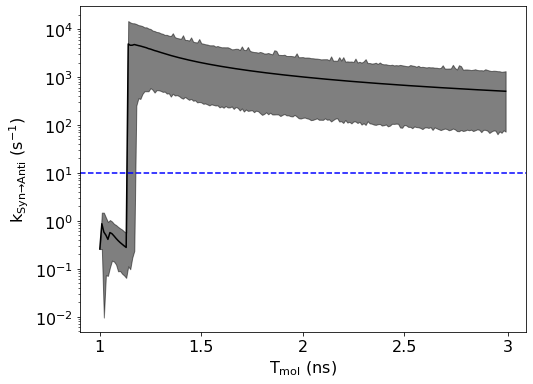

In [7]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'

plt.semilogy(rate_evol,color='k')
plt.fill_between(np.arange(201), rate_evol_lb, rate_evol_ub, color='k', alpha=0.5)
plt.axhline(10, color='b',linestyle='--')
plt.xticks([0,50,100,150,201],['1','1.5','2','2.5','3'])
plt.xlabel(r'T$_{\mathrm{mol}}$ (ns)')
plt.ylabel(r'k$_{\mathrm{Syn \to Anti}}$ (s$^{-1}$)')
#plt.text(90,40,'Experimental rate = 100 s$^{-1}$')
plt.savefig('ld_run11_CIT1rate_100iter.jpg', dpi=300, bbox_inches='tight', facecolor='w')

# IMP: cis and trans population in alpha and beta

In [1]:
import numpy as np
from westpa.analysis import Run
import pickle
import matplotlib.pyplot as plt
import h5py
import scienceplots

west = Run.open('west.h5')
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
statelabels = np.array(f['statelabels'])[:,:,1] # Current states

with open('psi_iters.pkl','rb') as k:
    psi_iters = pickle.load(k)

In [2]:
cis_alpha = []
cis_beta = []
trans_alpha = []
trans_beta = []

for i in range(0,west.num_iterations):
    cis = np.where(statelabels[i] == 0)
    trans = np.where(statelabels[i] == 1)
    alpha = np.where( (np.deg2rad(-120) <= psi_iters[i].flatten()) &  (psi_iters[i].flatten()<= np.deg2rad(0)))
    beta = np.where( (psi_iters[i].flatten() >= np.deg2rad(50)) | (psi_iters[i].flatten() <= np.deg2rad(-160)) )
    cis_alpha.append(west.iteration(i+1).weights[np.intersect1d(cis,alpha)].sum())
    cis_beta.append(west.iteration(i+1).weights[np.intersect1d(cis,beta)].sum())
    trans_alpha.append(west.iteration(i+1).weights[np.intersect1d(trans,alpha)].sum())
    trans_beta.append(west.iteration(i+1).weights[np.intersect1d(trans,beta)].sum())
cis_alpha = np.array(cis_alpha)
cis_beta = np.array(cis_beta)
trans_alpha = np.array(trans_alpha)
trans_beta = np.array(trans_beta)

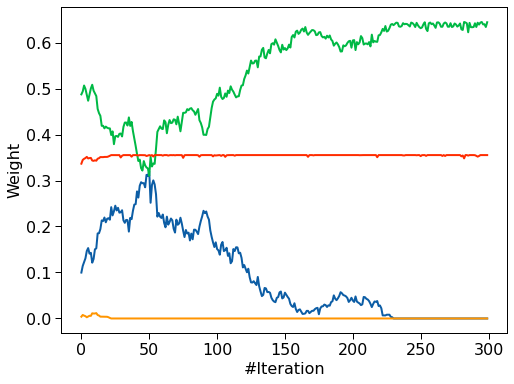

In [31]:
plt.style.use(['notebook','no-latex','std-colors'])
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
plt.plot(cis_alpha, linewidth=2)
plt.plot(cis_beta, linewidth=2)
plt.plot(trans_alpha, linewidth=2)
plt.plot(trans_beta, linewidth=2)
#plt.text(250,0.6,f'{np.mean(cis_beta[250:]):.3f}')
#plt.text(200,0.06,f'{np.mean(cis_alpha[250:]):.3e}')
#plt.text(250,0.37,f'{np.mean(trans_beta[250:]):.3f}')
#plt.text(250,0.01,f'{np.mean(trans_alpha[250:]):.3e}')
#plt.legend([r'Syn-$\alpha$',r'Syn-$\beta$',r'Anti-$\alpha$',r'Anti-$\beta$'], ncol=2,prop={'size': 10})
plt.xlabel('#Iteration')
plt.ylabel('Weight')
plt.savefig('subensemble_pop.png',dpi=300, bbox_inches='tight', facecolor='white')

# Old: Parent states of beta_transit states
Keep only those states whose parents are no in the present state 

In [5]:
beta_transit_immediate = []
for vals in beta_transit:
    iter_num = int(vals[10:16].lstrip('0'))
    iter_num_range = np.arange(iter_num)
    if vals[17:23].lstrip('0') == '':
        walker_num = 0
    else:
        walker_num = int(vals[17:23].lstrip('0'))
    current_statelabel = statelabels[iter_num-1,walker_num]
    parent_statelabel = statelabels[iter_num-2, west.iteration(iter_num).walker(walker_num).parent.index]
    if current_statelabel != parent_statelabel:
        beta_transit_immediate.append(vals)

### Psis of beta_transit_immediate

In [7]:
ipsi_history = []
for vals in beta_transit_immediate:
    iter_num = int(vals[10:16].lstrip('0'))
    iter_num_range = np.arange(iter_num)
    if vals[17:23].lstrip('0') == '':
        walker_num = 0
    else:
        walker_num = int(vals[17:23].lstrip('0'))
    trace = west.iteration(iter_num).walker(walker_num).trace()
    walker_hist_num = [t.index for t in trace]
    psis = []
    for i,j in zip(iter_num_range, walker_hist_num):
        psis.append(psi_iters[i][j])
    ipsi_history.append(psis)

In [16]:
np.concatenate(ipsi_history[0])

array([-0.639518  ,  0.03971804, -0.6345686 , -0.90443265, -1.1247277 ,
       -0.7354739 , -0.9749012 , -0.9751594 , -0.7761785 , -1.0416362 ,
       -0.49934146, -0.97685224, -0.866278  , -0.98806757, -1.0313919 ,
       -0.9821396 , -1.2034311 , -0.85341233, -0.94602877, -1.1138144 ,
       -0.8679863 , -0.8251584 , -1.054501  , -1.1978462 , -1.3021375 ,
       -1.355145  , -0.91600156, -0.94076717, -1.1364614 , -1.1518946 ,
       -1.0885848 , -1.0869837 , -1.0455477 , -1.279731  , -1.1339114 ,
       -0.863025  , -0.8979336 , -0.9422815 , -0.6997537 , -1.1465487 ,
       -1.1226705 , -1.0745147 , -1.2560872 , -1.0347128 , -0.9632435 ,
       -0.86597645, -1.1691761 , -1.1190674 , -1.0409195 , -1.2530788 ,
       -0.9973344 , -1.2463819 , -1.1535926 , -0.97585106, -1.1089687 ,
       -1.0979269 , -0.86747926, -1.1090631 , -1.0035158 , -0.95484513,
       -1.1692015 , -1.0975928 , -1.0323501 , -0.9404378 , -0.87394464,
       -1.1256616 , -1.1292405 , -1.2262031 , -1.016827  , -1.07

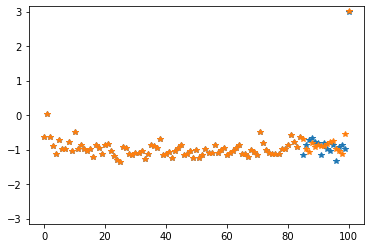

In [17]:
plt.ylim([-3.15,3.15])
for i in ipsi_history[:2]:
    plt.plot(np.concatenate(i),'*')

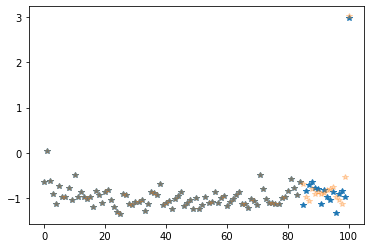

In [21]:
plt.plot(np.concatenate(ipsi_history[0]),'*')
plt.plot(np.concatenate(ipsi_history[1]),'*', alpha=0.3)

In [28]:
np.where(np.concatenate(ipsi_history[0]) > np.deg2rad(90))[0].shape[0] > 2

False

#### Check if multiple states are in beta

In [88]:
multi_betas = []
for i,psi_hist in enumerate(ipsi_history):
    num_beta = np.where(np.concatenate(psi_hist) > np.deg2rad(90))[0].shape[0]
    if num_beta == 5:
        multi_betas.append(i)

In [90]:
t_states

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=uint8)

In [ ]:
for i in multi_betas:
    state = beta_transit_immediate[i]
    iter_num = int(state[10:16].lstrip('0'))
    if state[17:23].lstrip('0') == '':
        walker_num = 0
    else:
        walker_num = int(vals[17:23].lstrip('0'))
    t = west.iteration(iter_num).walker(walker_num).trace()
    t_index = [seg.index for seg in t]
    t_states = statelabels[np.arange(iter_num),t_index]
    plt.plot()
    scatter = plt.scatter(np.arange(1,iter_num+1), ipsi_history[i], c=t_states)
    plt.legend(handles=scatter.legend_elements()[0], labels = ['C1','T1','int'])
    plt.show()

In [35]:
multi_betas

[527, 528, 529, 530, 531, 532, 533, 535, 536, 537, 538, 539, 540, 541]

In [42]:
beta_transit_immediate[multi_betas[13]]

'traj_segs/000203/000902/seg.xtc'

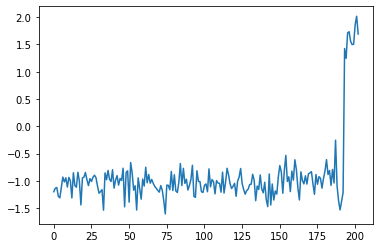

In [44]:
plt.plot(ipsi_history[multi_betas[13]])

In [50]:
t = west.iteration(203).walker(902).trace()
t_index = [seg.index for seg in t]
t_states = statelabels[np.arange(203),t_index]

In [61]:
import seaborn as sns

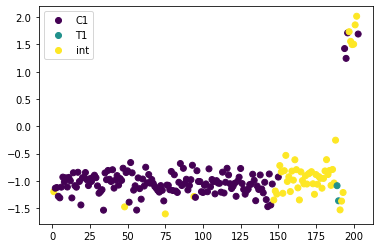

In [69]:
scatter = plt.scatter(np.arange(1,len(ipsi_history[multi_betas[13]])+1), ipsi_history[multi_betas[13]], c=t_states)
plt.legend(handles=scatter.legend_elements()[0], labels = ['C1','T1','int'])

In [67]:
scatter.legend_elements()[0]

# Psi histplot over timesteps

In [28]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

with open('psi_iters.pkl','rb') as f:
    psi_iters = pickle.load(f)

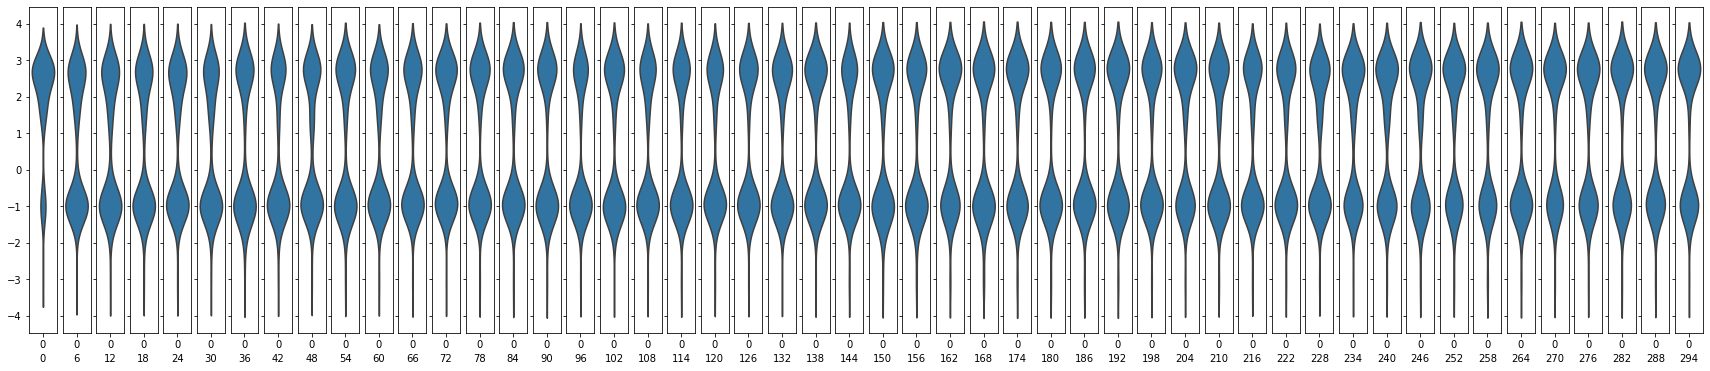

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=50, figsize=(30, 6), sharex=True, sharey=True)
for i in range(0,50):
    sns.violinplot(psi_iters[i*6], inner=None, ax=ax[i])
    ax[i].set_xlabel(str(i*6))

# Old:Find lowest energy path

In [7]:
import numpy as np
from westpa.analysis import Run
import h5py

* See west.cfg: C1_T1_100itfine section for bin defintion

In [8]:
f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
run11 = Run.open('west.h5')

In [25]:
c = np.array(f['statelabels'])
h = np.array(f['trajlabels'])

In [30]:
h.shape

(300, 1358, 2)

In [10]:
f.keys()

<KeysViewHDF5 ['assignments', 'bin_labels', 'labeled_populations', 'npts', 'nsegs', 'state_labels', 'state_map', 'statelabels', 'trajlabels']>

In [16]:
np.array(f['assignments']).shape

(300, 1358, 2)

In [18]:
np.array(f['bin_labels']).shape

(252,)

In [9]:
np.array(f['state_map'])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=uint16)

In [23]:
np.array(f['state_labels'])

array([b'C1a', b'T1'], dtype='|S3')

In [ ]:
np.array(f['bin_labels'])

In [4]:
f.keys()

<KeysViewHDF5 ['assignments', 'bin_labels', 'labeled_populations', 'npts', 'nsegs', 'state_labels', 'state_map', 'statelabels', 'trajlabels']>

In [27]:
np.array(f['labeled_populations']).shape

(300, 3, 309)

In [28]:
x = np.array(f['labeled_populations'])

In [98]:
total_bin_pop = x[100:,0,:].sum(axis=0)

In [95]:
import matplotlib.pyplot as plt

<StemContainer object of 3 artists>

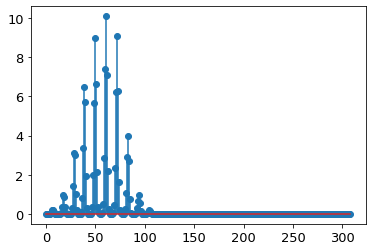

In [99]:
plt.stem(total_bin_pop)

In [100]:
reshape_pop = total_bin_pop[:-1].reshape(11,28)

In [101]:
total_bin_pop[:12]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.14864496e-04,
       1.10682699e-02, 4.80954020e-02, 1.84033296e-01, 2.17338469e-01,
       1.00240321e-01, 1.17972146e-02, 0.00000000e+00, 0.00000000e+00])

In [102]:
reshape_pop.shape

(11, 28)

In [103]:
reshape_pop.argmax(axis=0)

array([1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2])

In [104]:
prob_path = reshape_pop.argmax(axis=0)

In [105]:
path = np.zeros((11,28))

In [106]:
for i,val in enumerate(prob_path):
    path[val,i] = 1

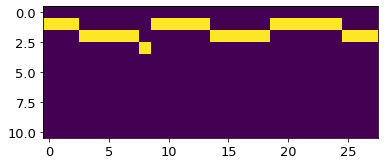

In [107]:
plt.imshow(path)

In [108]:
prob_path.shape

(28,)

# Tests

In [1]:
import numpy as np
from westpa.analysis import Run
import pickle
import matplotlib.pyplot as plt
import h5py

west = Run.open('west.h5')
#f = h5py.File('ANALYSIS/C1_T1_100itfine/assign.h5','r')
#statelabels = np.array(f['statelabels'])[:,:,1] # Current states

with open('psi_iters.pkl','rb') as f:
    psi_iters = pickle.load(f)

In [2]:
x = np.where(west.iteration(300).pcoords[:,1,0] < -50)

In [3]:
y = np.where(np.rad2deg(psi_iters[299].flatten()) > 120)

In [8]:
np.intersect1d(x,y)

array([  21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   42,   43,   44,   45,   46,   47,   48,   49,   50,
         51,   52,   53,  112,  113,  114,  115,  116,  117,  118,  119,
        120,  121,  122,  123,  124,  125,  126,  127,  128,  129,  130,
        131,  132,  133,  134,  135,  136,  137,  138,  139,  224,  225,
        226,  227,  228,  229,  230,  231,  232,  233,  234,  235,  236,
        237,  238,  239,  240,  241,  242,  243,  244,  245,  246,  247,
        248,  249,  251,  254,  256,  257,  259,  260,  261,  262,  263,
        264,  265,  266,  267,  268,  269,  270,  271,  272,  280,  281,
        282,  283,  284,  285,  286,  385,  386,  387,  388,  390,  391,
        392,  393,  394,  395,  397,  398,  399,  400,  401,  402,  403,
        404,  405,  406,  407,  408,  409,  410,  411,  412,  413,  414,
        415,  416,  417,  418,  419,  420,  421,  422,  423,  424,  425,
        426,  427,  428,  429,  430,  431,  432,  4

In [21]:
np.rad2deg(psi_iters[299])[1206]

array([144.52133], dtype=float32)

In [18]:
west.iteration(300).pcoords[21,1,0]

-104.565

In [1]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from westpa.analysis import Run
import h5py
import pyemma
import seaborn as sns

In [2]:
f = h5py.File('ANALYSIS/C1_T1_2it/assign.h5','r')

In [3]:
f.keys()

<KeysViewHDF5 ['assignments', 'bin_labels', 'labeled_populations', 'npts', 'nsegs', 'state_labels', 'state_map', 'statelabels', 'trajlabels']>

In [4]:
list(f['bin_labels'])

[b'[(-inf, -130.0), (-inf, 60.0)]',
 b'[(-inf, -130.0), (60.0, 130.0)]',
 b'[(-inf, -130.0), (130.0, inf)]',
 b'[(-130.0, -40.0), (-inf, 60.0)]',
 b'[(-130.0, -40.0), (60.0, 130.0)]',
 b'[(-130.0, -40.0), (130.0, inf)]',
 b'[(-40.0, 50.0), (-inf, 60.0)]',
 b'[(-40.0, 50.0), (60.0, 130.0)]',
 b'[(-40.0, 50.0), (130.0, inf)]',
 b'[(50.0, 130.0), (-inf, 60.0)]',
 b'[(50.0, 130.0), (60.0, 130.0)]',
 b'[(50.0, 130.0), (130.0, inf)]',
 b'[(130.0, inf), (-inf, 60.0)]',
 b'[(130.0, inf), (60.0, 130.0)]',
 b'[(130.0, inf), (130.0, inf)]']

In [16]:
list(f['state_labels'])

[b'C1', b'T1']

In [17]:
list(f['state_map'])

[2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]

In [20]:
c = np.array(f['statelabels'])
h = np.array(f['trajlabels'])
a = np.array(f['assignments'])

In [8]:
run11 = Run.open('west.h5')

In [10]:
x = run11.iteration(10).walker(10).trace()

In [11]:
run11.iteration(10).walker(10).trace().initial_state.pcoord[1]

67.2

In [12]:
x.initial_state.pcoord[1]

67.2

In [13]:
hist_iter = np.array([walker.iteration.number for walker in x])

In [14]:
hist_walker = np.array([walker.index for walker in x])

In [52]:
h[hist_iter-1, hist_walker].flatten()

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [53]:
h_hist = h[hist_iter-1, hist_walker].flatten()

In [57]:
0 in h_hist

True

In [27]:
c[hist_iter-1, hist_walker].flatten()

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [23]:
a[hist_iter-1, hist_walker].flatten()

array([7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=uint8)

In [26]:
list(f['bin_labels'])[4]

b'[(-130.0, -40.0), (60.0, 130.0)]'

In [37]:
hist_T1 = np.where(c == 1)

In [ ]:
T1_hist_labels = []
for iteration,segment in zip(hist_T1[0],hist_T1[1]):
    t = run11.iteration(iteration+1).walker(segment).trace()
    t_iter = np.arange(1,iteration+2)
    t_walker = np.arange([walker.index for walker in t])
    t_hist = h[t_iter-1, t_walker].flatten()
    if 0 in t_hist:
        T1_hist_label.append(str(iteration+1).zfill(6)+'/'+str(segment).zfill(6)+'/seg.xtc')

In [3]:
run11 = Run.open('west.h5') # istates in intermediate regions, here we believe that the intermediate states also relax to C1 states.
run9 = Run.open('west.h5') # istates in C1, here we see that C1 does not convert to intermedidate states.

In [ ]:
bins = [-inf, -130, -40, 50, 130, inf ]
dim1 = [np.digitize(iteration.pcoords[:,1,0],bins, right=True) for iteration in run]

In [28]:
C1_states = [ np.where(iteration ==2) for iteration in dim1]
int_states = [ np.where(iteration ==3) for iteration in dim1]
T1_states = [ np.where(iteration ==4) for iteration in dim1]

In [29]:
topology = 'common_files/lld_ini.pdb'

In [30]:
traj_list = []
for iteration, segments in enumerate(C1_states):
    for s in segments[0]:
        traj_list.append('traj_segs/'+str(iteration+1).zfill(6)+'/'+str(s).zfill(6)+'/seg.xtc')
C1_list = traj_list

In [31]:
traj_list = []
for iteration, segments in enumerate(int_states):
    for s in segments[0]:
        traj_list.append('traj_segs/'+str(iteration+1).zfill(6)+'/'+str(s).zfill(6)+'/seg.xtc')
int_list = traj_list

In [32]:
traj_list = []
for iteration, segments in enumerate(T1_states):
    for s in segments[0]:
        traj_list.append('traj_segs/'+str(iteration+1).zfill(6)+'/'+str(s).zfill(6)+'/seg.xtc')
T1_list = traj_list

In [33]:
np.save('int_list', int_list)
np.save('C1_list', C1_list)
np.save('T1_list', T1_list)

In [34]:
int_list = list(np.load('int_list.npy'))
C1_list = list(np.load('C1_list.npy'))
T1_list = list(np.load('T1_list.npy'))

In [35]:
featurizer = pyemma.coordinates.featurizer(topology)

In [36]:
dihedral_indices = np.genfromtxt('../dihedral_indices.txt', skip_header=2).astype(int)
di1 = 10
di2 = 18

In [37]:
featurizer.add_dihedrals(dihedral_indices)

In [39]:
int_coord_data = pyemma.coordinates.load(int_list,features=featurizer)
C1_coord_data = pyemma.coordinates.load(C1_list,features=featurizer)
T1_coord_data = pyemma.coordinates.load(list(T1_list),features=featurizer)

100%|██████████| 13959/13959 [00:14<00:00, 941.34it/s]                                 


In [40]:
int_coord_data = np.array([i[1,:] for i in int_coord_data])
C1_coord_data = np.array([i[1,:] for i in C1_coord_data])
T1_coord_data = np.array([i[1,:] for i in T1_coord_data])
coord_data = np.concatenate((int_coord_data,C1_coord_data,T1_coord_data))

In [49]:
pc_data = np.stack([coord_data[:,di1],coord_data[:,di2]], axis =1) #progress coordinate data

(-3.2, 3.2)

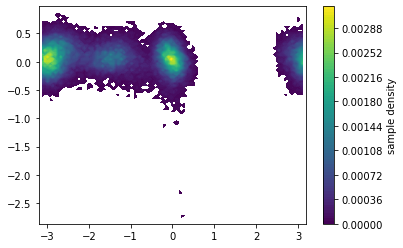

In [50]:
pyemma.plots.plot_density(*pc_data.T)
plt.xlim([-3.2, 3.2])

(<Figure size 1440x1440 with 1 Axes>,
 <AxesSubplot:xlabel='Feature values', ylabel='Feature histograms'>)

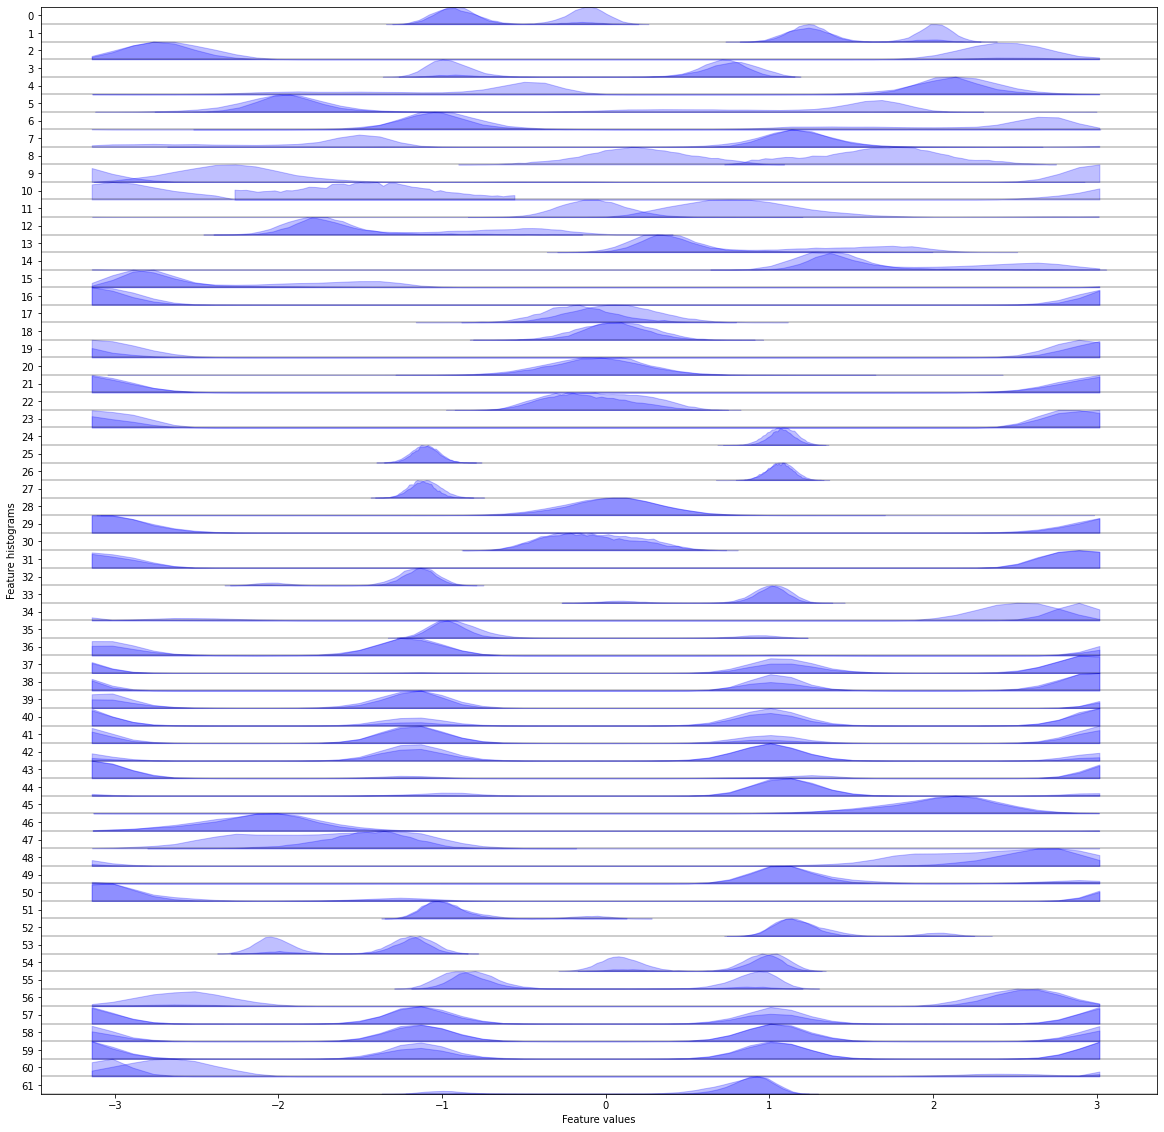

In [72]:
fig, ax = plt.subplots(figsize=(20, 20))
pyemma.plots.plot_feature_histograms(C1_coord_data, ax=ax, ignore_dim_warning=True)
pyemma.plots.plot_feature_histograms(int_coord_data, ax=ax, ignore_dim_warning=True)

In [51]:
pca = pyemma.coordinates.pca(data, dim=8)
pca_output = pca.get_output()

/home/akshay/apps/anaconda/anaconda3/envs/westpa-2022.02/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/akshay/apps/anaconda/anaconda3/envs/westpa-2022.02/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


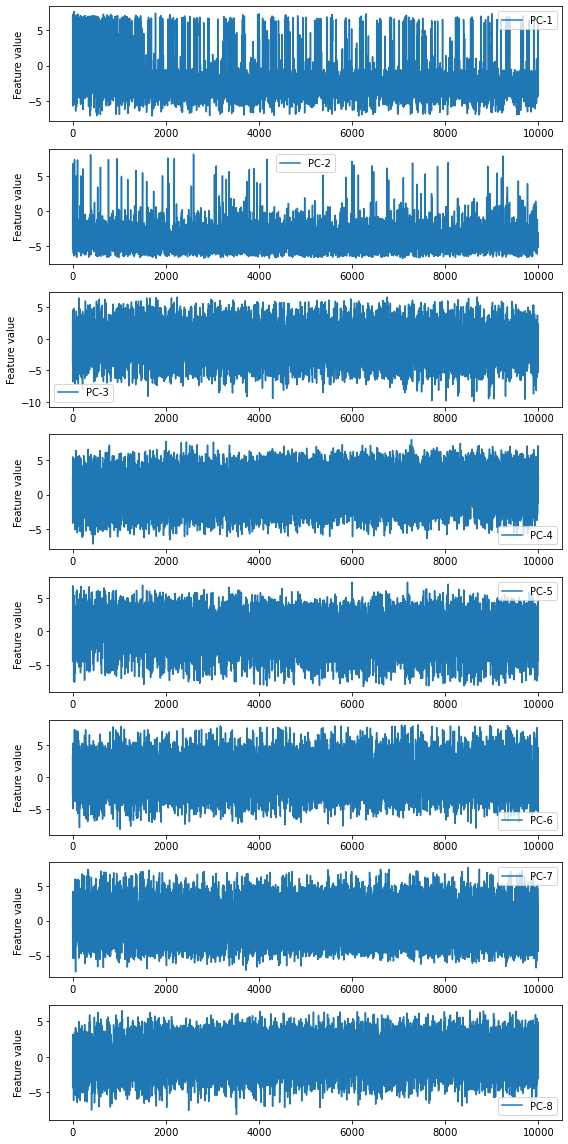

In [53]:
dim = 8
fig, axes = plt.subplots(dim,1,figsize=(dim,dim*2))
for ic in range(0,dim):
    ax = axes[ic]
    ax.plot(pca_output[0][:10000,ic], label='PC-'+str(ic+1))
    ax.set_ylabel('Feature value')
    ax.legend()
    fig.tight_layout()

In [16]:
from scipy.stats import pearsonr
PCA_feature_correlation = np.zeros((data.shape[1], dim))

for i in range(data.shape[1]):
    for j in range(dim):
        PCA_feature_correlation[i, j] = np.abs(pearsonr(data[:, i],pca_output[0][:, j])[0])

In [20]:
pearsonr(data[:, i],pca_output[0][:, j])[0]

0.3452599010692465

Text(0.5, 1.0, 'Pearson correlation coefficient')

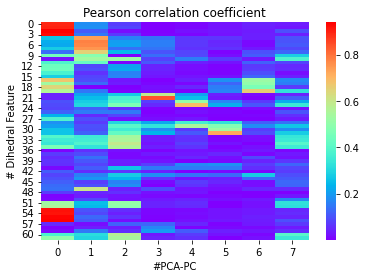

In [17]:
sns.heatmap(PCA_feature_correlation, cmap='rainbow')
plt.xlabel('#PCA-PC')
plt.ylabel('# Dihedral Feature')
plt.title('Pearson correlation coefficient')

In [18]:
np.save('pcaoutput_8_run11.npy',pca_output)